<a href="https://colab.research.google.com/github/pravallikai/Evolution-of-musical-trends-using-py/blob/main/notebooks/9_PCA_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (41106, 11)
Standardization complete.
K-Means complete. Unique clusters: [2 3 0 1 4]
Explained variance ratio: [0.39491784 0.21164979]


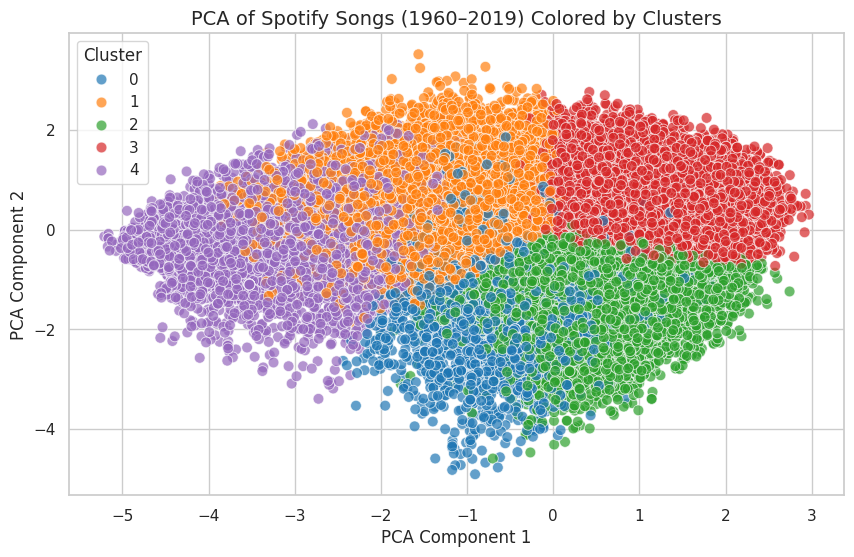

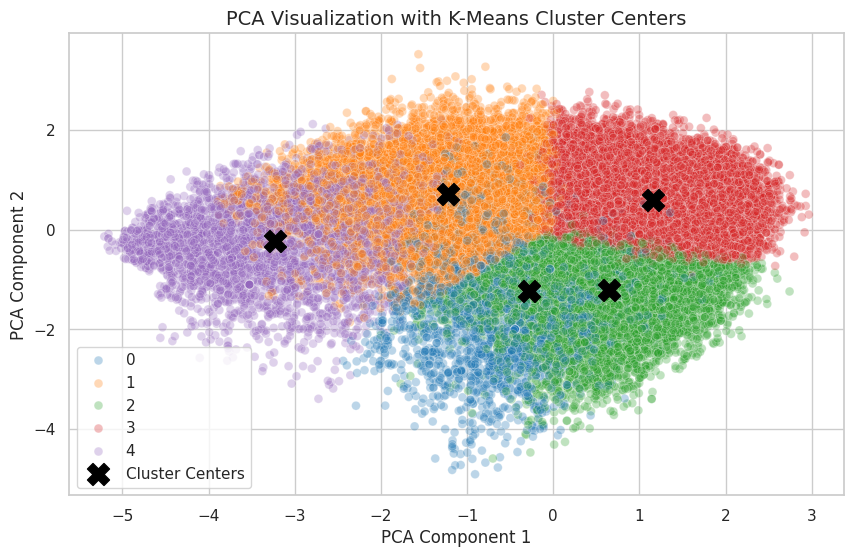

Saved PCA output: /content/spotify_pca_clusters.csv


In [7]:
# ================================================================
# 09_PCA_Dimensionality_Reduction.ipynb
# ================================================================

# --- 1) Import Libraries ---
import pandas as pd  # Import the pandas library for data manipulation and analysis
import numpy as np  # Import the numpy library for numerical operations
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling
from sklearn.decomposition import PCA  # Import PCA for Principal Component Analysis
from sklearn.cluster import KMeans  # Import KMeans for clustering
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting
import seaborn as sns  # Import seaborn for enhanced data visualization

sns.set(style="whitegrid")  # Set the seaborn style for plots to 'whitegrid'

# --- 2) Load Cleaned Data ---
CLEANED_PATH = "/content/spotify_audio_features_1960_2019_clean.csv"  # Define the path to the cleaned dataset
df = pd.read_csv(CLEANED_PATH)  # Load the CSV file into a pandas DataFrame

print("Dataset shape:", df.shape)  # Print the dimensions (rows, columns) of the DataFrame
df.head()  # Display the first 5 rows of the DataFrame


# --- 3) Define Features for PCA ---
features = ['energy', 'danceability', 'tempo', 'valence',
            'acousticness', 'instrumentalness']  # Define a list of features to be used for PCA


# --- 4) Standardize Features ---
scaler = StandardScaler()  # Initialize the StandardScaler
X_scaled = scaler.fit_transform(df[features])  # Fit the scaler to the selected features and transform them

print("Standardization complete.")  # Print a message indicating completion of standardization


# --- 5) Run K-Means (needed for cluster-colored PCA plot) ---
k = 5  # Set the number of clusters for K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Initialize KMeans with the specified number of clusters and random state
df['cluster'] = kmeans.fit_predict(X_scaled)  # Fit KMeans to the scaled data and assign cluster labels to the DataFrame

print("K-Means complete. Unique clusters:", df['cluster'].unique())  # Print a message and the unique cluster labels


# --- 6) Apply PCA (reduce to 2 components) ---
pca = PCA(n_components=2)  # Initialize PCA to reduce data to 2 principal components
X_pca = pca.fit_transform(X_scaled)  # Fit PCA to the scaled data and transform it

df['PCA1'] = X_pca[:, 0]  # Add the first principal component as a new column to the DataFrame
df['PCA2'] = X_pca[:, 1]  # Add the second principal component as a new column to the DataFrame

print("Explained variance ratio:", pca.explained_variance_ratio_)  # Print the explained variance ratio for each component


# --- 7) PCA Scatter Plot Colored by Clusters ---
plt.figure(figsize=(10, 6))  # Create a new figure with a specified size
sns.scatterplot(data=df, x='PCA1', y='PCA2',
                hue='cluster', palette='tab10',
                alpha=0.7, s=60)  # Create a scatter plot of PCA components, colored by cluster

plt.title("PCA of Spotify Songs (1960–2019) Colored by Clusters", fontsize=14)  # Set the title of the plot
plt.xlabel("PCA Component 1")  # Set the label for the x-axis
plt.ylabel("PCA Component 2")  # Set the label for the y-axis
plt.legend(title="Cluster")  # Display the legend with a title
plt.show()  # Show the plot


# --- 8) Plot Cluster Centers in PCA Space ---
centers = kmeans.cluster_centers_  # Get the coordinates of the K-Means cluster centers in the original feature space
centers_pca = pca.transform(centers)  # Transform the cluster centers into the PCA space

plt.figure(figsize=(10, 6))  # Create a new figure with a specified size
sns.scatterplot(data=df, x='PCA1', y='PCA2',
                hue='cluster', palette='tab10',
                alpha=0.3, s=40)  # Create a scatter plot of PCA components with reduced alpha for data points

# Cluster centers
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            c='black', s=250, marker='X', label='Cluster Centers')  # Plot the transformed cluster centers

plt.title("PCA Visualization with K-Means Cluster Centers", fontsize=14)  # Set the title of the plot
plt.xlabel("PCA Component 1")  # Set the label for the x-axis
plt.ylabel("PCA Component 2")  # Set the label for the y-axis
plt.legend()  # Display the legend
plt.show()  # Show the plot


# --- 9) Optional: Save PCA + Clusters dataset ---
OUTPUT_PATH = "/content/spotify_pca_clusters.csv"  # Define the output path for the saved CSV file
df.to_csv(OUTPUT_PATH, index=False)  # Save the DataFrame with PCA components and cluster labels to a CSV file
print("Saved PCA output:", OUTPUT_PATH)  # Print a message indicating the file has been saved and its path